In [1]:
import pandas as pd

import numpy as np
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,accuracy_score

from sklearn.ensemble import RandomForestClassifier

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
train_df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Pre-Processing the data

In [4]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
train_df.drop(["PassengerId","Name","Ticket","Cabin"], axis = 1, inplace = True)

filling missing age with median age because missing values effect the prediction.

In [6]:
train_df["Age"].fillna((train_df["Age"].mean()), inplace=True)

In [7]:
train_df = train_df.dropna(how='any',axis=0)

Here is the result

In [8]:
train_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [9]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


percent of people survived and dead.

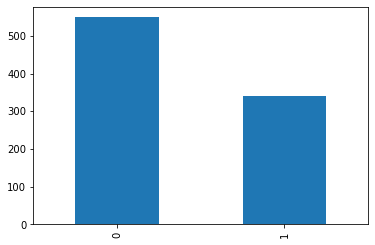

In [10]:
train_df["Survived"].value_counts().plot(kind="bar")

A person with more than 2 children is more likely to survive, and a person who is alone is more likely to die.

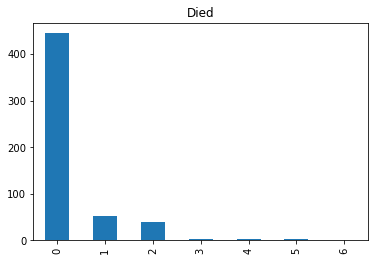

In [13]:
train_df[train_df["Survived"]==0]["Parch"].value_counts().sort_index().plot(kind = "bar", title = "Died")

A person boarded with more than 2 siblings or spouses more likely survived and a person boarded without siblings or spouse more likely dead.

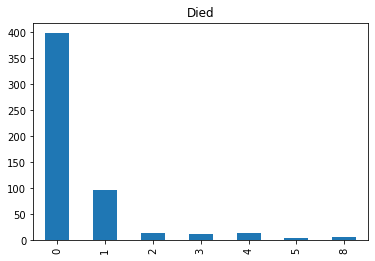

In [15]:
train_df[train_df["Survived"]==0]["SibSp"].value_counts().sort_index().plot(kind = "bar",title = "Died")

# Prepare Data for Modelling

In [16]:
train_df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

I will transform Embarked and Sex columns to numerical values, because machine learning models work with number better

In [17]:
print(train_df["Sex"].unique())
print(train_df["Embarked"].unique())

['male' 'female']
['S' 'C' 'Q']


In [18]:
sex_mapping = {"male": 0, "female": 1}
train_df['Sex'] = train_df['Sex'].map(sex_mapping)
print(train_df["Sex"].unique())

[0 1]


In [19]:
embarked_mapping = {"S":0,"C":1,"Q":2}
train_df['Embarked'] = train_df['Embarked'].map(embarked_mapping)
print(train_df["Embarked"].unique())

[0 1 2]


Let's transform the test data

In [20]:
test_df["Age"].fillna((test_df["Age"].mean()), inplace=True)
test_df["Fare"].fillna((test_df["Fare"].mean()), inplace=True)

In [21]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [22]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [23]:
test_df.drop(["PassengerId","Name","Ticket","Cabin"], axis = 1, inplace = True)


In [24]:
test_df['Sex'] = test_df['Sex'].map(sex_mapping)

In [25]:
test_df['Embarked'] = test_df['Embarked'].map(embarked_mapping)

Here the result 

In [26]:
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,2
1,3,1,47.0,1,0,7.0000,0
2,2,0,62.0,0,0,9.6875,2
3,3,0,27.0,0,0,8.6625,0
4,3,1,22.0,1,1,12.2875,0


# Creating the Model Using Random Forest Classifier

In [27]:
y_try = train_df["Survived"]
X_try = train_df.drop("Survived",axis = 1)

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X_try,y_try,train_size=0.8,test_size=0.2,random_state=0)

In [29]:
Rfc=RandomForestClassifier(n_estimators=40,random_state=1)
Rfc.fit(X_train,y_train)
y_pred=Rfc.predict(X_test)

In [30]:
print(mean_absolute_error(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

0.24157303370786518
0.7584269662921348


Predicting values of Test data

In [31]:
Rfc=RandomForestClassifier(n_estimators=40,random_state=1)
Rfc.fit(X_try,y_try)
y_pred=Rfc.predict(test_df)

In [32]:
final_df = test_df
final_df["predicted"] = y_pred

In [33]:
final_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,predicted
0,3,0,34.5,0,0,7.8292,2,0
1,3,1,47.0,1,0,7.0000,0,0
2,2,0,62.0,0,0,9.6875,2,0
3,3,0,27.0,0,0,8.6625,0,1
4,3,1,22.0,1,1,12.2875,0,0
